In [232]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [238]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 11

    def reset(self):
        # 0 mode for deterministic & 1 for stochastic
        self.mode = 0
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        #obstacle1
        self.obstacle1_pos = [1,2]
        #obstacle2
        self.obstacle2_pos = [3,0]
        #reward2
        self.reward2_pos = [1,3]
        #reward3
        self.reward3_pos = [2,1]
        #reward4
        self.reward4_pos = [3,2]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.6
        self.state[tuple(self.obstacle1_pos)] = 0.4
        self.state[tuple(self.obstacle2_pos)] = 0.4
        self.state[tuple(self.reward2_pos)] = 0.7
        self.state[tuple(self.reward3_pos)] = 0.7
        self.state[tuple(self.reward4_pos)] = 0.7
        observation = self.state.flatten()
        return observation

    def step(self, action):
        if action == 0:
            self.agent_pos[0] += 1
        if action == 1:
            self.agent_pos[0] -= 1
        if action == 2:
            self.agent_pos[1] += 1
        if action == 3:
            self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        
        self.state = np.zeros((4,4))
        self.state[tuple(self.goal_pos)] = 0.05
        self.state[tuple(self.obstacle1_pos)] = 0.4
        self.state[tuple(self.obstacle2_pos)] = 0.4
        self.state[tuple(self.reward2_pos)] = 0.7
        self.state[tuple(self.reward3_pos)] = 0.7
        self.state[tuple(self.reward4_pos)] = 0.7
        self.state[tuple(self.agent_pos)] = 1
        observation = self.state.flatten()
        reward = 0
        reward_pos_list = [self.reward2_pos, self.reward3_pos, self.reward4_pos]
        obstacle_pos_list = [self.obstacle1_pos, self.obstacle2_pos]

        if (self.agent_pos == self.goal_pos).all():
            reward = 3
        elif (self.agent_pos.tolist() in obstacle_pos_list):
            reward = -1
        elif (self.agent_pos.tolist() in reward_pos_list):
            reward = 2
        
        #all(tuple(self.agent_pos) in pos for pos in obstacle_pos_list)

        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        if done:
            reward = -3
        info = []

        return observation, reward, done, info
    
    def set_mode(self, mode_val):
        self.mode = mode_val

    def render(self):
        plt.imshow(self.state, cmap='turbo')

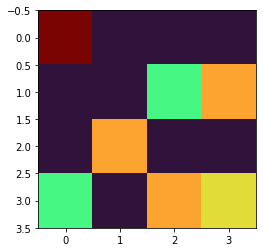

In [239]:
env = GridEnvironment()
obs = env.reset()
env.render()

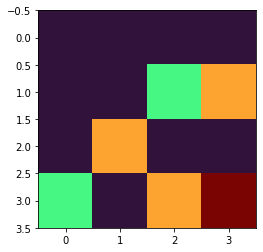

<IPython.core.display.Javascript object>

[0, 0, -1, 2, 0, 0, 2, 0, 2, 3, -3]
Total reward = 5


In [240]:
# 11 step demo to show logical progression in the env
output_grid = widgets.Grid(1, 1)
rewards = []
for action in [2, 2, 0, 2, 0, 3, 3, 0, 2, 2, 2]:
    observation, reward, done, info = env.step(action)
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        env.render()
    rewards.append(reward)
    time.sleep(1)
print(rewards)
print("Total reward =", sum(rewards))

# Note below the reward for the last action is -3 even though the agent remains in goal position.
# This is because the max time steps(11) have expired and further steps are penalised.
# The idea here is that the agent should learn to stop after max time steps, to avoid these penalties.